<a href="https://colab.research.google.com/github/rajguru9889/ML_LAB/blob/main/week_3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(X.shape)
X.head()


(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1. Filter Methods

In [ ]:
#a) Constant Features
from sklearn.feature_selection import VarianceThreshold

# threshold=0 removes constant features
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)

constant_features = [column for column in X.columns
                     if column not in X.columns[constant_filter.get_support()]]
print("Constant Features:", constant_features)


Constant Features: []


In [ ]:
#quasi constant
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X)

quasi_constant_features = [column for column in X.columns
                           if column not in X.columns[quasi_constant_filter.get_support()]]
print("Quasi-Constant Features:", quasi_constant_features)


Quasi-Constant Features: ['mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [ ]:
#duplicate_features
X_T = X.T
duplicate_features = X_T[X_T.duplicated()].index
print("Duplicate Features:", duplicate_features.tolist())


Duplicate Features: []


ii) Statistical Methods

In [ ]:
#Correlation
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly Correlated Features:", high_corr_features)


Highly Correlated Features: ['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']


In [ ]:
#mutual_information
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
print(mi_series.sort_values(ascending=False))

worst perimeter            0.471833
worst area                 0.464407
worst radius               0.451598
mean concave points        0.440209
worst concave points       0.436101
mean perimeter             0.404661
mean concavity             0.374451
mean radius                0.365650
mean area                  0.361192
area error                 0.339163
worst concavity            0.314941
perimeter error            0.274518
radius error               0.247491
worst compactness          0.225903
mean compactness           0.211100
concave points error       0.127218
worst texture              0.121492
concavity error            0.117433
worst smoothness           0.099381
mean texture               0.095496
worst symmetry             0.094303
mean smoothness            0.085879
compactness error          0.078154
worst fractal dimension    0.070798
mean symmetry              0.064786
fractal dimension error    0.037053
smoothness error           0.014487
symmetry error             0

In [ ]:
#chi square
from sklearn.feature_selection import chi2, SelectKBest
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X, y)
chi2_features = X.columns[chi2_selector.get_support()]
print("Top 10 features by Chi-Square Test:", chi2_features.tolist())

Top 10 features by Chi-Square Test: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


In [ ]:
#Annova
from sklearn.feature_selection import f_classif
anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(X, y)
anova_features = X.columns[anova_selector.get_support()]
print("Top 10 features by ANOVA:", anova_features.tolist())

Top 10 features by ANOVA: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [ ]:
#roc-auc
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score
scores = {}
for feature in X.columns:
    model = LogisticRegression(max_iter=1000)
    score = cross_val_score(model, X[[feature]], y, cv=5, scoring='roc_auc').mean()
    scores[feature] = score
roc_auc_df = pd.Series(scores).sort_values(ascending=False)
print("Top 10 features by ROC-AUC:\n", roc_auc_df.head(10))

Top 10 features by ROC-AUC:
 worst perimeter         0.976980
worst radius            0.970666
worst area              0.970575
worst concave points    0.968088
mean concave points     0.963372
mean perimeter          0.949938
mean area               0.941474
mean radius             0.940656
mean concavity          0.936799
area error              0.928352
dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , accuracy_score, confusion_matrix, classification_report , confusion_matrix , precision_score , recall_score , f1_score

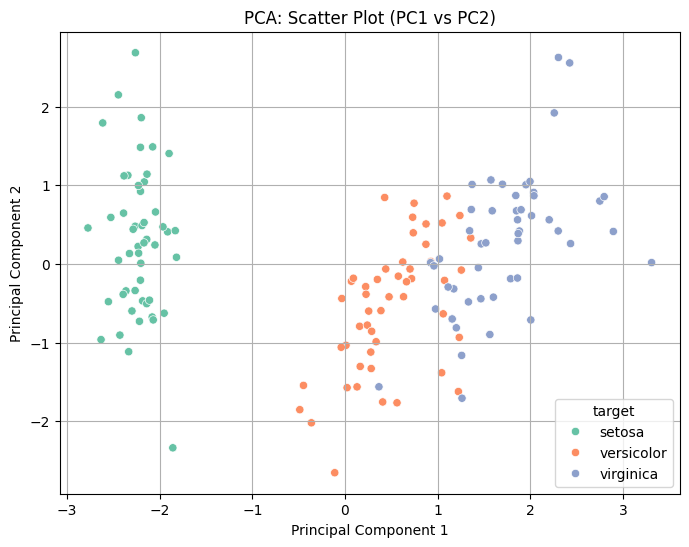

PCA Loadings (Variable Contributions):

                   PC1       PC2
sepal_length  0.521066  0.377418
sepal_width  -0.269347  0.923296
petal_length  0.580413  0.024492
petal_width   0.564857  0.066942

Variance explained by each PC:
 [0.72962445 0.22850762 0.03668922 0.00517871]

PC1 explains 72.96% variance
PC2 explains 22.85% variance


In [2]:
df = sns.load_dataset("iris").dropna()

X = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["target"] = df.iloc[:, -1] if "species" in df.columns else None

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set2")
plt.title("PCA: Scatter Plot (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(X.columns))],
                        index=X.columns)

print("PCA Loadings (Variable Contributions):\n")
print(loadings.iloc[:, :2])

explained_var = pca.explained_variance_ratio_
print("\nVariance explained by each PC:\n", explained_var)
print(f"\nPC1 explains {explained_var[0]*100:.2f}% variance")
print(f"PC2 explains {explained_var[1]*100:.2f}% variance")


Number of Principal Components explaining >80% variance: 2


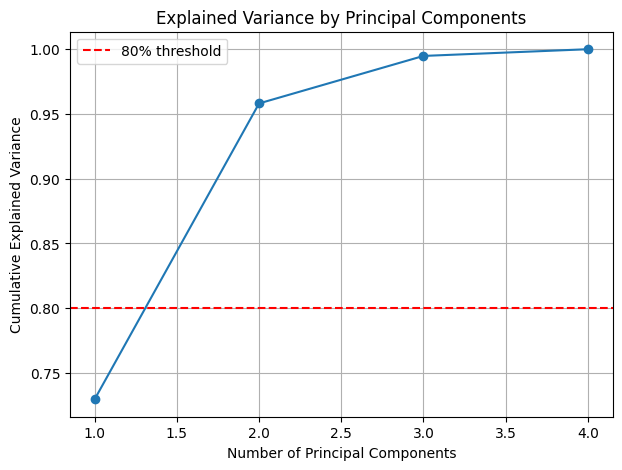

In [3]:
cumulative_var = np.cumsum(explained_var)
num_components_80 = np.argmax(cumulative_var >= 0.80) + 1

print(f"\nNumber of Principal Components explaining >80% variance: {num_components_80}")
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()
